# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [24]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [26]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = 'dc88accfc79841d1a6d3d95c7a39f2c8' #os.getenv('NEWS_API_KEY')

print(api_key)

dc88accfc79841d1a6d3d95c7a39f2c8


In [27]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [29]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news_df = newsapi.get_everything(q = "Bitcoin", language = "en")

print(f"Total articles about Bitcoin: {bitcoin_news_df['totalResults']}")


Total articles about Bitcoin: 4261


In [31]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_df = newsapi.get_everything(q='Ethereum',language = 'en')

print(f"Total articles about Ethereum: {ethereum_news_df['totalResults']}")

Total articles about Ethereum: 1170


In [54]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
def news_df(topic):
    news = newsapi.get_everything(q=topic,
                from_param='2020-10-29',
                to='2020-11-29',
                language='en',
                sort_by='relevancy',
                page=2)

    
    articles = []
    for article in news['articles']:
        try:
            sentiment = analyzer.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            
            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "compound": sentiment["compound"],
                "positive": sentiment["pos"],
                "negative": sentiment["neg"],
                "neutral": sentiment["neu"],
            })
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)


In [55]:
# Create the ethereum sentiment scores DataFrame
ethereum_articles = news_df('Ethereum')
bitcoin_articles = news_df('Bitcoin')
bitcoin_articles.head()

,title,description,text,date,compound,positive,negative,neutral
0,"Inflation-hedge, risk-on bet: What's behind bi...",Is it an inflation hedge? A currency? Or just ...,LONDON (Reuters) - Is it an inflation hedge? A...,2020-11-19,0.7041,0.154,0.0,0.846
1,"Inflation-hedge, risk-on bet: What's behind bi...",Is it an inflation hedge? A currency? Or just ...,LONDON (Reuters) - Is it an inflation hedge? A...,2020-11-19,0.7041,0.154,0.0,0.846
2,What Entrepreneurs Can Learn From Square's $50...,Learn why Square put 1% of their total assets ...,"November\r\n13, 2020\r\n5 min read\r\nOpinions...",2020-11-13,0.1779,0.145,0.0,0.855
3,"Bitcoin rises to three-year peak, all-time hig...",Bitcoin <BTC=BTSP> rose to a nearly three-year...,By Reuters Staff\r\nA representation of virtua...,2020-11-20,0.4019,0.110,0.0,0.890
4,"Bitcoin rises to three-year peak, all-time hig...",Bitcoin <BTC=BTSP> rose to a nearly three-year...,By Reuters Staff\r\nA representation of virtua...,2020-11-20,0.4019,0.117,0.0,0.883


In [56]:
# Describe the Bitcoin Sentiment
bitcoin_articles.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.271085,0.089750,0.022750,0.887450
std,0.313718,0.057004,0.040826,0.065009
min,-0.421500,0.000000,0.000000,0.768000
25%,0.133425,0.067000,0.000000,0.846000
50%,0.234400,0.092000,0.000000,0.865000
75%,0.451275,0.146500,0.044500,0.933000
max,0.704100,0.159000,0.141000,1.000000


In [57]:
# Describe the Ethereum Sentiment
ethereum_articles.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.228995,0.079300,0.009550,0.911050
std,0.273326,0.096921,0.019752,0.100657
min,-0.273200,0.000000,0.000000,0.615000
25%,0.000000,0.000000,0.000000,0.858250
50%,0.234000,0.073000,0.000000,0.926000
75%,0.411525,0.132750,0.000000,1.000000
max,0.648600,0.385000,0.057000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [64]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [65]:
# Complete the tokenizer function
def process_article(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
    

In [77]:
# Create a new tokens column for bitcoin
bitcoin_articles["description"]
article = process_article(bitcoin_articles["description"])
 
articles = []
for i in article:
    try:
        sentiment = analyzer.polarity_scores(article)
        title = article["title"]
        description = articl
            
        articles.append({
            "title": title,
            "description": description,
            "text": text,
            "date": date,
            "compound": sentiment["compound"],
             "positive": sentiment["pos"],
            "negative": sentiment["neg"],
            "neutral": sentiment["neu"],
        })
    except AttributeError:
        pass
    
pd.DataFrame(articles)


0     Is it an inflation hedge? A currency? Or just ...
1     Is it an inflation hedge? A currency? Or just ...
2     Learn why Square put 1% of their total assets ...
3     Bitcoin <BTC=BTSP> rose to a nearly three-year...
4     Bitcoin <BTC=BTSP> rose to a nearly three-year...
5     <ol><li>Satoshi Nakamoto's Bitcoin White Paper...
6     Is it an inflation hedge? A currency? Or just ...
7     <ol><li>Every Major Bank Will Have Exposure to...
8     Bitcoin hit $19,000 on Tuesday for the first t...
9     Bitcoin hit $19,000 on Tuesday for the first t...
10    Twitter has named a new head of security a few...
11    Bitcoin investors, which include top hedge fun...
12    Bitcoin investors, which include top hedge fun...
13    Bitcoin on Tuesday soared to its highest level...
14    Bitcoin investors, which include top hedge fun...
15    Bitcoin passed $17,000 on Tuesday to touch its...
16    Bitcoin on Tuesday soared to its highest level...
17    Bitcoin investors, which include top hedge

""


In [71]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
article = ethereum_articles["description"]
#process_article(article)
print(article)

0     The world's largest digital currency asset man...
1     Bitcoin passed $17,000 on Tuesday to touch its...
2     Bitcoin passed $17,000 on Tuesday to touch its...
3     Bitcoin hits nearly three-year peak, homes in ...
4     Bitcoin on Tuesday soared to its highest level...
5     Largest crypto investment manager tops $10 bil...
6     Tim Copeland / Decrypt:\nEthereum Foundation s...
7     Colin Harper / CoinDesk:\nEthereum's “Genesis ...
8     Omkar Godbole / CoinDesk:\nGlassnode: Ethereum...
9     The event will be held from November 9 to 12 t...
10    As ethereum developers gear up for the launch ...
11    The "Big Three" of crypto have gained between ...
12    The future of financial learning is online, ce...
13         Decentralized Finance is the next big thing.
14    The price of Ethereum (ETH), the second-larges...
15    In this tutorial, we'll write a simple smart c...
16    Ethereum, XRP, litecoin and chainlink, with a ...
17    Ethereum and EOS blockchains are being use

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [80]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [81]:
# Generate the Bitcoin N-grams where N=2
def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [82]:
# Generate the Ethereum N-grams where N=2
corpus = bitcoin_articles["description"]
bigram_counter(corpus)

,bigram,count
0,"(virtual, currency)",6
1,"(bitcoin, investor)",4
2,"(investor, include)",4
3,"(include, top)",4
4,"(top, hedge)",4
5,"(hedge, fund)",4
6,"(fund, money)",4
7,"(money, manager)",4
8,"(manager, betting)",4
9,"(betting, virtual)",4


In [83]:
corpus = ethereum_articles["description"]
bigram_counter(corpus)

,bigram,count
0,"(highest, level)",3
1,"(mainstream, acceptance)",3
2,"(ethereum, blockchain)",3
3,"(bitcoin, passed)",2
4,"(passed, tuesday)",2
5,"(tuesday, touch)",2
6,"(touch, highest)",2
7,"(level, year)",2
8,"(year, investor)",2
9,"(investor, ascribing)",2


In [84]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=['word', 'count'])

In [85]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
tokens = bitcoin_articles["description"]
token_count(tokens, N=10)

[('Bitcoin investors, which include top hedge funds and money managers, are betting the virtual currency could more than quintuple to as high as $100,000 in a year.',
  4),
 ('Is it an inflation hedge? A currency? Or just another niche asset to take a punt on? Bitcoin is in the headlines, re-kindling a debate over its true role and the drivers behind its latest scintillating rally.',
  3),
 ('Bitcoin hit $19,000 on Tuesday for the first time in nearly three years, homing in on its all-time high of just under $20,000.',
  2),
 ("Bitcoin on Tuesday soared to its highest level since December 2017 as the asset's perceived quality as a hedge against inflation and expectations of mainstream acceptance lured institutional and retail demand.",
  2),
 ('Learn why Square put 1% of their total assets in Bitcoin.', 1),
 ('Bitcoin <BTC=BTSP> rose to a nearly three-year high on Friday, as investors continued to scoop the virtual currency on expectations it could well exceed its all-time peak of just

In [86]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
tokens = ethereum_articles["description"]
token_count(tokens, N=10)

[('Bitcoin passed $17,000 on Tuesday to touch its highest level this year, with investors ascribing the gains to demand for its perceived inflation-resistant qualities and expectations of wider mainstream acceptance.',
  2),
 ("The world's largest digital currency asset manager Grayscale said on Wednesday its assets under management soared to a record $10.4 billion, bolstered by the continued rise in investment inflows as well as the surge in the price of bitcoin.",
  1),
 ('Bitcoin hits nearly three-year peak, homes in on record\xa0\xa0Reuters.com',
  1),
 ("Bitcoin on Tuesday soared to its highest level since December 2017 as the asset's perceived quality as a hedge against inflation and expectations of mainstream acceptance lured institutional and retail demand.",
  1),
 ('Largest crypto investment manager tops $10 billion in assets\xa0\xa0Reuters',
  1),
 ('Tim Copeland / Decrypt:\nEthereum Foundation says Ethereum 2.0 is set to launch on December 1 if enough validators are present

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from nltk.corpus import stopwords
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


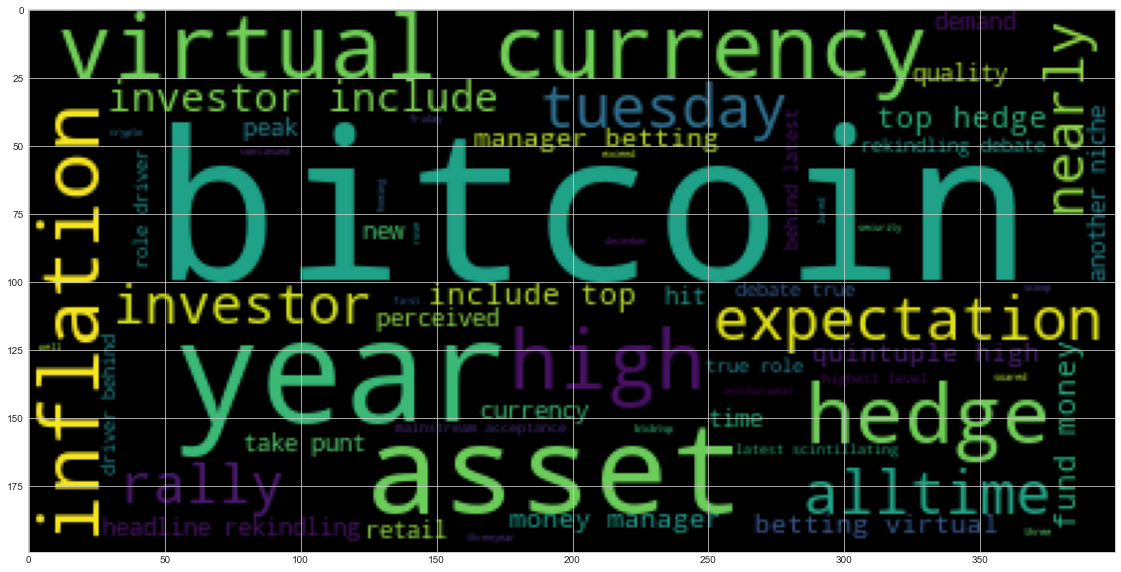

In [90]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
corpus = bitcoin_articles["description"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

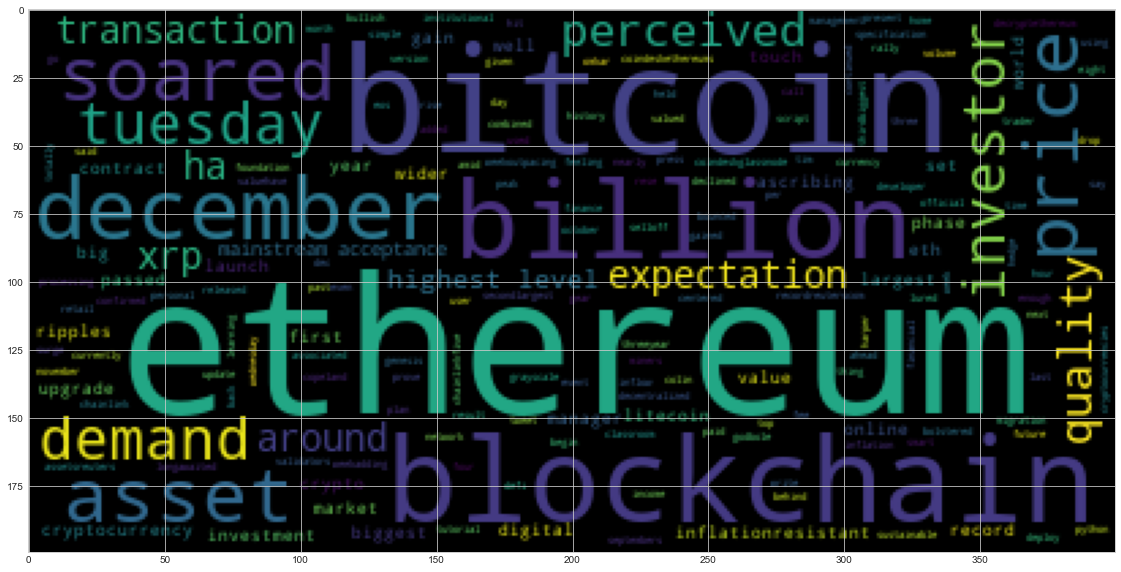

In [91]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
corpus = ethereum_articles["description"]

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [93]:
import spacy
from spacy import displacy

In [97]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047113 sha256=167f78ac8d031b7778a3fc16ce7363b43702d0173ec347ef6dd5f397102de2aa
  Stored in directory: C:\Users\TRAVIS~1\AppData\Local\Temp\pip-ephem-wheel-cache-c_t7p2ga\wheels\b7\0d\f0\7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [98]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

## Bitcoin NER

In [99]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
article = ethereum_articles["description"].str.cat()

In [100]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(article)

NameError: name 'nlp' is not defined

In [101]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

NameError: name 'doc' is not defined

In [33]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
article = bitcoin_articles["description"].str.cat()

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(article)

In [36]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [37]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f